In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# cd drive/MyDrive/Thesis

In [20]:
# !pip install pycodestyle pycodestyle_magic
# !pip install flake8
# %load_ext pycodestyle_magic

In [3]:
# %%pycodestyle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Load DataFrame


In [4]:
# %%pycodestyle
df = pd.read_csv('creditcard.csv')
df.head()
# Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

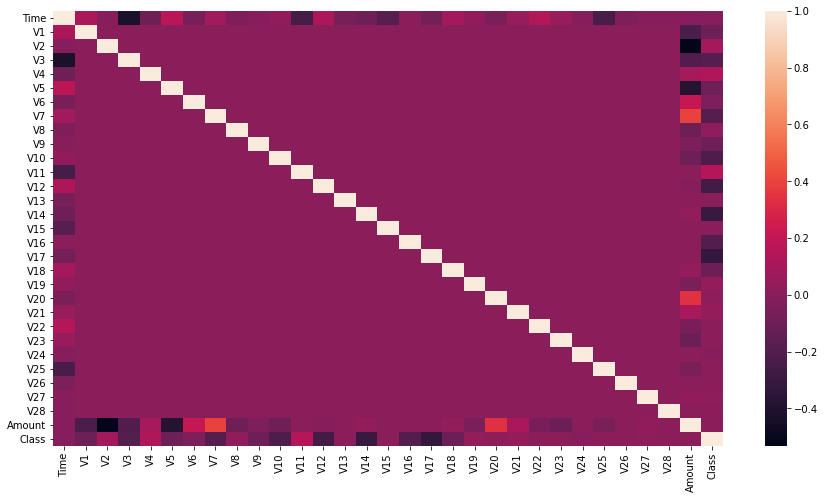

In [5]:
# %%pycodestyle
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 8))
sns.heatmap(df.corr())

[Text(0, 0, 'Genuine (0)'), Text(1, 0, 'Fraud (1)')]

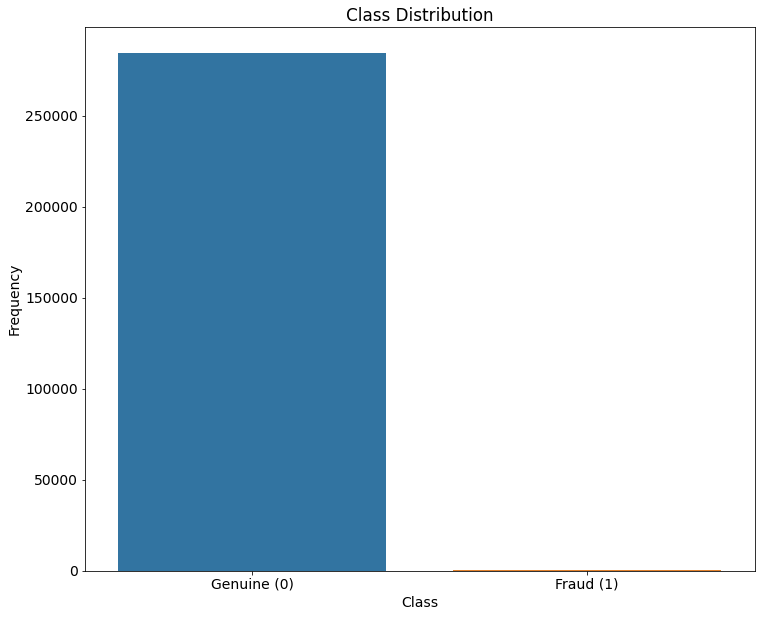

In [6]:
# %%pycodestyle
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.countplot(data=df, x='Class')
ax.set_title('Class Distribution')
ax.set(xlabel="Class", ylabel = "Frequency")
ax.set_xticklabels(['Genuine (0)', 'Fraud (1)'])

## Normalization ('Amount')


In [7]:
scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']].values)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Split X, y

In [8]:
# %%pycodestyle
y = df[['Class']]
X = df.drop(['Class'], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## Random Oversampling

In [10]:
oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=14)
X_over_1, y_over_1 = oversampler.fit_resample(X_train,y_train)
y_over_1 = np.ravel(y_over_1)
print(Counter(y_over_1))

oversampler = RandomOverSampler(sampling_strategy=0.2, random_state=14)
X_over_2, y_over_2 = oversampler.fit_resample(X_train,y_train)
y_over_2 = np.ravel(y_over_2)
print(Counter(y_over_2))

oversampler = RandomOverSampler(sampling_strategy=0.3, random_state=14)
X_over_3, y_over_3 = oversampler.fit_resample(X_train,y_train)
y_over_3 = np.ravel(y_over_3)
print(Counter(y_over_3))

oversampler = RandomOverSampler(sampling_strategy=0.4, random_state=14)
X_over_4, y_over_4 = oversampler.fit_resample(X_train,y_train)
y_over_4 = np.ravel(y_over_4)
print(Counter(y_over_4))

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=14)
X_over_5, y_over_5 = oversampler.fit_resample(X_train,y_train)
y_over_5 = np.ravel(y_over_5)
print(Counter(y_over_5))

oversampler = RandomOverSampler(sampling_strategy=0.6, random_state=14)
X_over_6, y_over_6 = oversampler.fit_resample(X_train,y_train)
y_over_6 = np.ravel(y_over_6)
print(Counter(y_over_6))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.7, random_state=14)
X_over_7, y_over_7 = oversampler.fit_resample(X_train,y_train)
y_over_7 = np.ravel(y_over_7)
print(Counter(y_over_7))

oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=14)
X_over_8, y_over_8 = oversampler.fit_resample(X_train,y_train)
y_over_8 = np.ravel(y_over_8)
print(Counter(y_over_8))

oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=14)
X_over_9, y_over_9 = oversampler.fit_resample(X_train,y_train)
y_over_9 = np.ravel(y_over_9)
print(Counter(y_over_9))

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=14)
X_over, y_over = oversampler.fit_resample(X_train,y_train)
y_over = np.ravel(y_over)
print(Counter(y_over))

Counter({0: 199013, 1: 19901})
Counter({0: 199013, 1: 39802})
Counter({0: 199013, 1: 59703})
Counter({0: 199013, 1: 79605})
Counter({0: 199013, 1: 99506})
Counter({0: 199013, 1: 119407})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 139309})
Counter({0: 199013, 1: 159210})
Counter({0: 199013, 1: 179111})
Counter({0: 199013, 1: 199013})


## Random Undersampling

In [11]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=14)
X_under, y_under = undersampler.fit_resample(X_train,y_train)
y_under = np.ravel(y_under)
Counter(y_under)

Counter({0: 351, 1: 351})

## SMOTE

In [12]:
smote = SMOTE(sampling_strategy=0.1,random_state=14)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote = np.ravel(y_smote)
Counter(y_smote)

Counter({0: 199013, 1: 19901})

## Tomek Links Removal

In [13]:
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X_train,y_train)
y_tomek = np.ravel(y_tomek)
Counter(y_tomek)

Counter({0: 198999, 1: 351})

## Hybrid

In [14]:
# Applying tomek after smote
X_hybrid, y_hybrid = tomek.fit_resample(X_smote, y_smote)
y_hybrid = np.ravel(y_hybrid)
Counter(y_hybrid)

Counter({0: 198845, 1: 19901})

# Logistic Regression no Resampling

## Parameter Tuning using Cross-Validation (GridSearchCV)

In [15]:
PARAM = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,1]}
clf = LogisticRegression(max_iter=1000)
search = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [12]:
# %%pycodestyle
search.fit(X_train, np.ravel(y_train))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   7.8s
[CV 2/10] END .........................................C=0.1; total time=   6.7s
[CV 3/10] END .........................................C=0.1; total time=   5.7s
[CV 4/10] END .........................................C=0.1; total time=   8.8s
[CV 5/10] END .........................................C=0.1; total time=  15.0s
[CV 6/10] END .........................................C=0.1; total time=  11.2s
[CV 7/10] END .........................................C=0.1; total time=   9.4s
[CV 8/10] END .........................................C=0.1; total time=   7.3s
[CV 9/10] END .........................................C=0.1; total time=  12.7s
[CV 10/10] END ........................................C=0.1; total time=   7.0s
[CV 1/10] END .........................................C=0.2; total time=   7.2s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [13]:
# %%pycodestyle
best_C = search.best_params_['C']
print(best_C)
LR = LogisticRegression(C=best_C, max_iter= 1000)
LR.fit(X_train, np.ravel(y_train))
y_pred = LR.predict(X_test)

0.1


## Confustion matrix for LR not Resampling

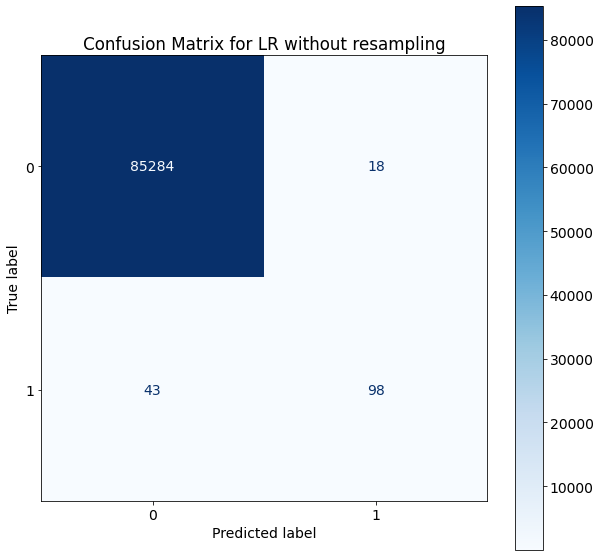

In [14]:
# %%pycodestyle
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR without resampling')
plot_confusion_matrix(LR, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR not Resampling

### Precision

In [15]:
precision_LR_no_resampling_1 = round(precision_score(y_test, y_pred),5)
print(precision_LR_no_resampling_1)
precision_LR_no_resampling_0 = round(precision_score(y_test, y_pred, pos_label=0),5)
print(precision_LR_no_resampling_0)
precision_LR_no_resampling_avg = round(precision_score(y_test, y_pred, average='micro'),5)
print(precision_LR_no_resampling_avg)

0.84483
0.9995
0.99929


### Recall

In [16]:
recall_LR_no_resampling_1 = round(recall_score(y_test, y_pred),5)
print(recall_LR_no_resampling_1)
recall_LR_no_resampling_0 = round(recall_score(y_test, y_pred, pos_label=0),5)
print(recall_LR_no_resampling_0)
recall_LR_no_resampling_avg = round(recall_score(y_test, y_pred, average='micro'),5)
print(recall_LR_no_resampling_avg)

0.69504
0.99979
0.99929


### F1 Score

In [17]:
f1_LR_no_resampling_1 = round(f1_score(y_test, y_pred),5)
print(f1_LR_no_resampling_1)
f1_LR_no_resampling_0 = round(f1_score(y_test, y_pred, pos_label=0),5)
print(f1_LR_no_resampling_0)
f1_LR_no_resampling_avg = round(f1_score(y_test, y_pred, average='micro'),5)
print(f1_LR_no_resampling_avg)

0.76265
0.99964
0.99929


### Classification report

In [18]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99950   0.99979   0.99964     85302
     Class 1    0.84483   0.69504   0.76265       141

    accuracy                        0.99929     85443
   macro avg    0.92216   0.84741   0.88114     85443
weighted avg    0.99924   0.99929   0.99925     85443



## PR Curve

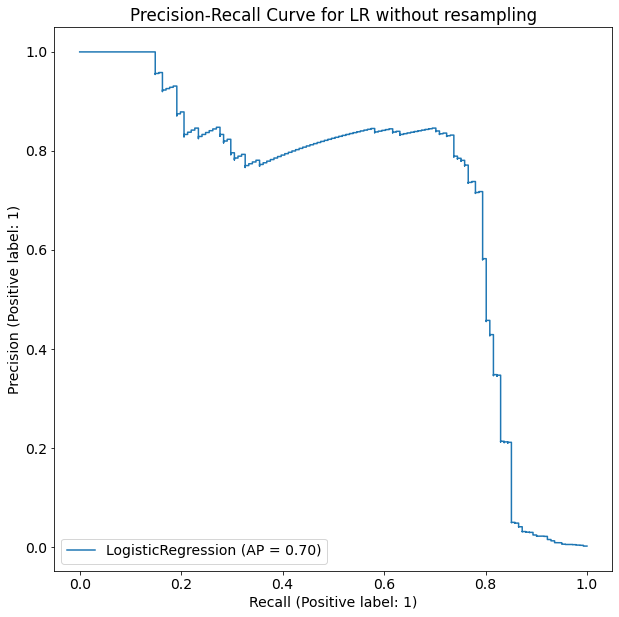

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR without resampling')
plot_precision_recall_curve(LR, X_test, y_test, ax=ax)

## ROC Curve

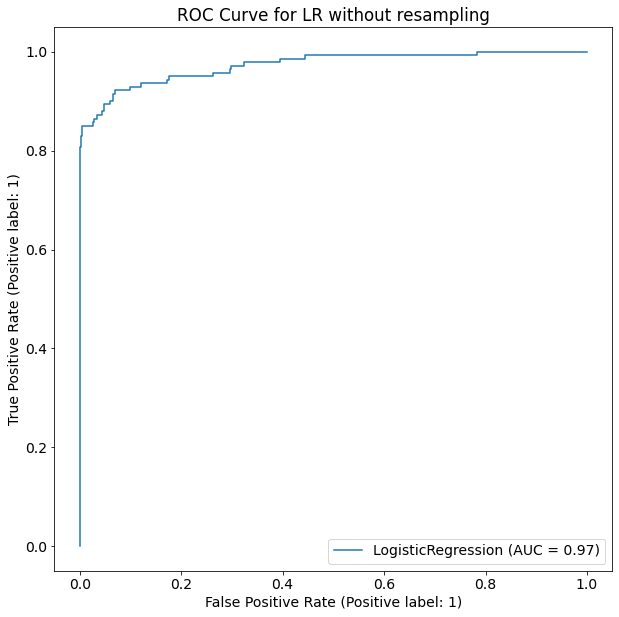

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR without resampling')
plot_roc_curve(LR, X_test, y_test, ax=ax)

# Logistic Regression with Random Oversampling

## 10% Oversampling

### Parameter Tuning using Cross-Validation

In [21]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [22]:
search_over.fit(X_over_1, y_over_1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.0s
[CV 2/10] END .........................................C=0.1; total time=   1.6s
[CV 3/10] END .........................................C=0.1; total time=   2.8s
[CV 4/10] END .........................................C=0.1; total time=  10.1s
[CV 5/10] END .........................................C=0.1; total time=   2.5s
[CV 6/10] END .........................................C=0.1; total time=   4.0s
[CV 7/10] END .........................................C=0.1; total time=   3.3s
[CV 8/10] END .........................................C=0.1; total time=   3.5s
[CV 9/10] END .........................................C=0.1; total time=   4.1s
[CV 10/10] END ........................................C=0.1; total time=   2.4s
[CV 1/10] END .........................................C=0.2; total time=   2.2s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [24]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_1, y_over_1)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 10% Random Oversampling

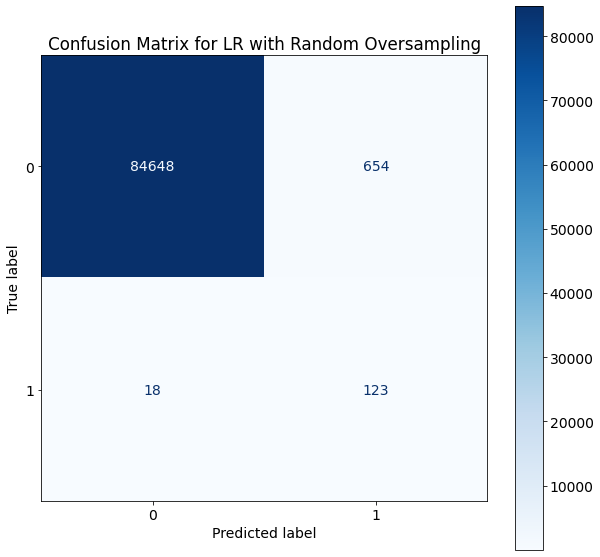

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 10% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 10% Random Oversampling

#### Precision

In [26]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.1583
0.99979
0.9984


#### Recall

In [27]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.87234
0.99233
0.99214


#### F1 Score

In [28]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.26797
0.99605
0.99484


#### Classification Report

In [29]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99979   0.99233   0.99605     85302
     Class 1    0.15830   0.87234   0.26797       141

    accuracy                        0.99214     85443
   macro avg    0.57904   0.93234   0.63201     85443
weighted avg    0.99840   0.99214   0.99484     85443



### PR Curve

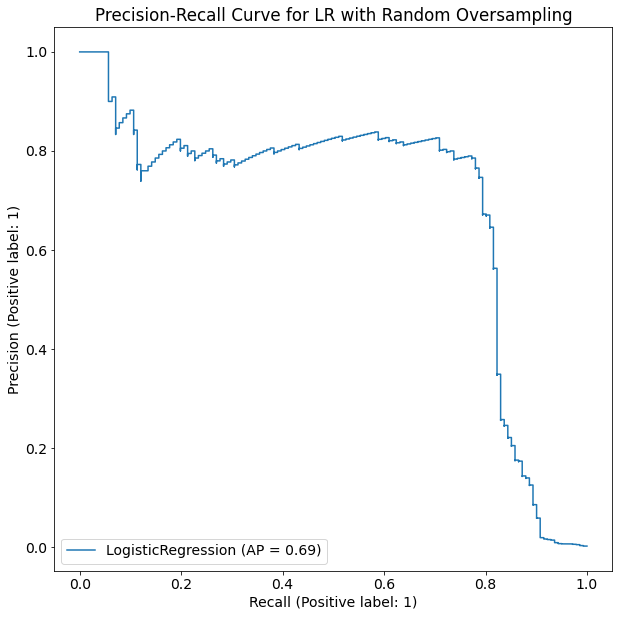

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 10% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

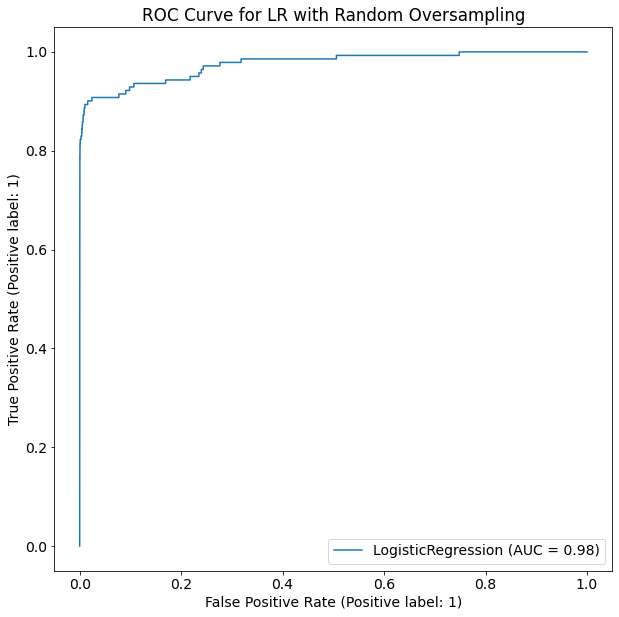

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 10% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 20% Oversampling

### Parameter Tuning using Cross-Validation

In [16]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [17]:
search_over.fit(X_over_2, y_over_2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   1.8s
[CV 2/10] END .........................................C=0.1; total time=   2.0s
[CV 3/10] END .........................................C=0.1; total time=   1.4s
[CV 4/10] END .........................................C=0.1; total time=   1.3s
[CV 5/10] END .........................................C=0.1; total time=   1.4s
[CV 6/10] END .........................................C=0.1; total time=   2.2s
[CV 7/10] END .........................................C=0.1; total time=   2.2s
[CV 8/10] END .........................................C=0.1; total time=   1.9s
[CV 9/10] END .........................................C=0.1; total time=   2.4s
[CV 10/10] END ........................................C=0.1; total time=   1.4s
[CV 1/10] END .........................................C=0.2; total time=   1.3s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [18]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_2, y_over_2)
y_over_pred = LR_over.predict(X_test)

0.7


### Confusion matrix for LR with 20% Random Oversampling

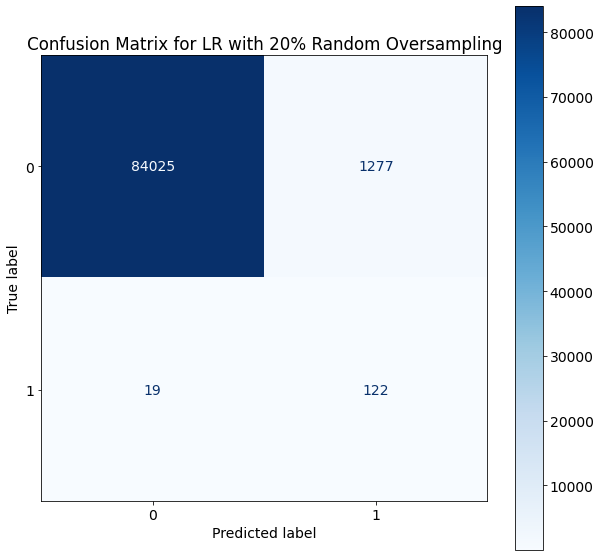

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 20% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 20% Random Oversampling

#### Precision

In [20]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.08721
0.99977
0.99827


#### Recall

In [21]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.86525
0.98503
0.98483


#### F1 Score

In [22]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.15844
0.99235
0.99097


#### Classification Report

In [23]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99977   0.98503   0.99235     85302
     Class 1    0.08721   0.86525   0.15844       141

    accuracy                        0.98483     85443
   macro avg    0.54349   0.92514   0.57539     85443
weighted avg    0.99827   0.98483   0.99097     85443



### PR Curve

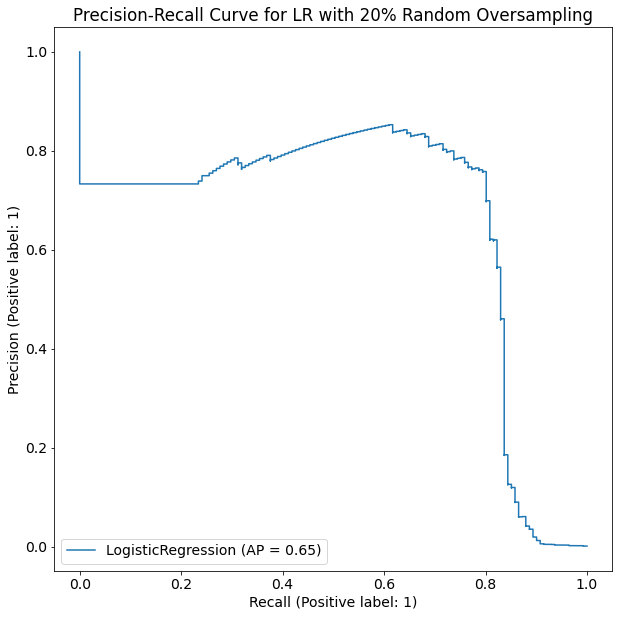

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 20% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

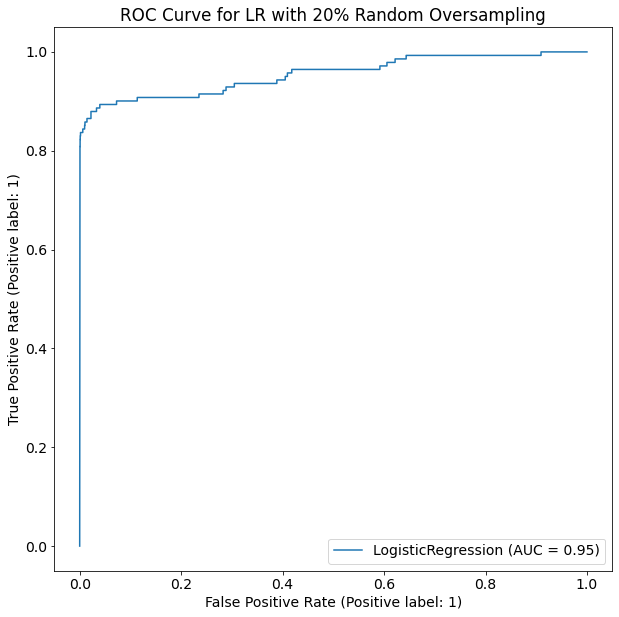

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 20% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 30% Oversampling

### Parameter Tuning using Cross-Validation

In [26]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [27]:
search_over.fit(X_over_3, y_over_3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.9s
[CV 2/10] END .........................................C=0.1; total time=   1.8s
[CV 3/10] END .........................................C=0.1; total time=   5.4s
[CV 4/10] END .........................................C=0.1; total time=   2.0s
[CV 5/10] END .........................................C=0.1; total time=   1.9s
[CV 6/10] END .........................................C=0.1; total time=   1.8s
[CV 7/10] END .........................................C=0.1; total time=   3.8s
[CV 8/10] END .........................................C=0.1; total time=   1.6s
[CV 9/10] END .........................................C=0.1; total time=   2.4s
[CV 10/10] END ........................................C=0.1; total time=   2.5s
[CV 1/10] END .........................................C=0.2; total time=   2.4s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [28]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_3, y_over_3)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 30% Random Oversampling

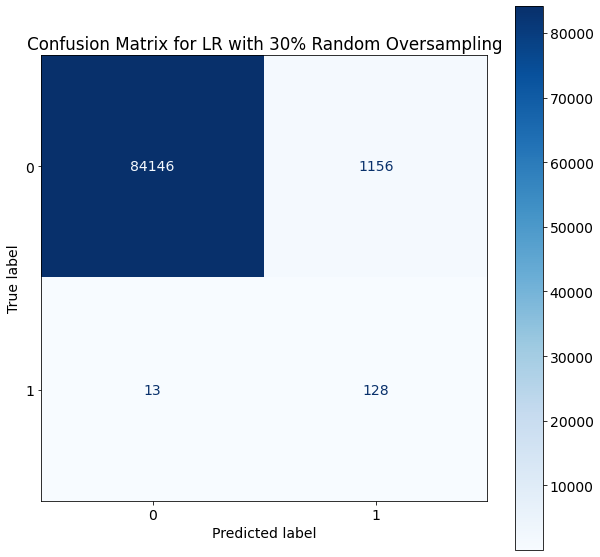

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 30% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 30% Random Oversampling

#### Precision

In [30]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.09969
0.99985
0.99836


#### Recall

In [31]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.98645
0.98632


#### F1 Score

In [32]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.17965
0.9931
0.99176


#### Classification Report

In [33]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.98645   0.99310     85302
     Class 1    0.09969   0.90780   0.17965       141

    accuracy                        0.98632     85443
   macro avg    0.54977   0.94712   0.58638     85443
weighted avg    0.99836   0.98632   0.99176     85443



### PR Curve

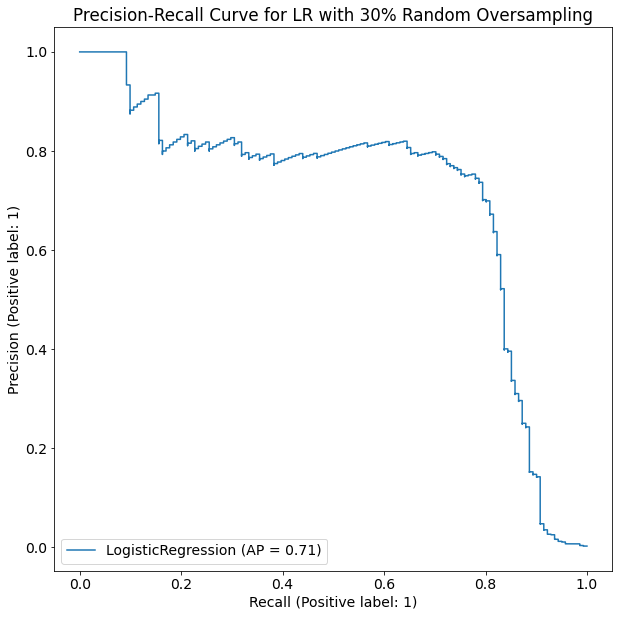

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 30% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

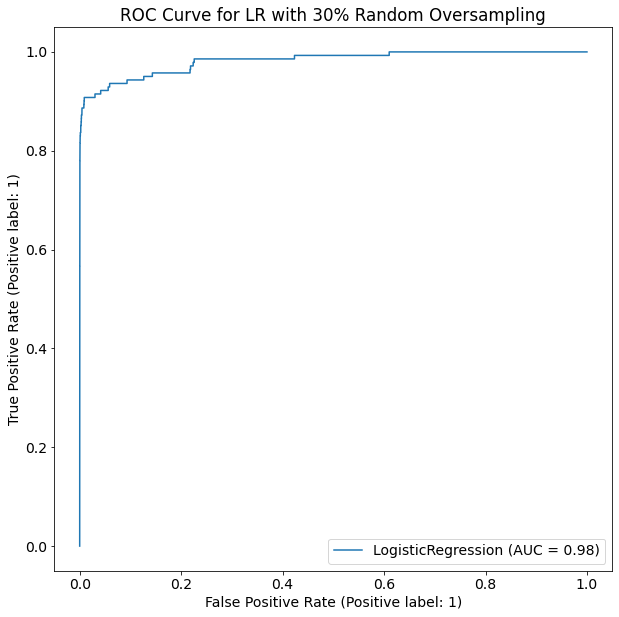

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 30% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 40% Oversampling

### Parameter Tuning using Cross-Validation

In [38]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [39]:
search_over.fit(X_over_4, y_over_4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   3.3s
[CV 2/10] END .........................................C=0.1; total time=   3.1s
[CV 3/10] END .........................................C=0.1; total time=   9.7s
[CV 4/10] END .........................................C=0.1; total time=   2.0s
[CV 5/10] END .........................................C=0.1; total time=   2.9s
[CV 6/10] END .........................................C=0.1; total time=   2.8s
[CV 7/10] END .........................................C=0.1; total time=   2.7s
[CV 8/10] END .........................................C=0.1; total time=   3.0s
[CV 9/10] END .........................................C=0.1; total time=   3.8s
[CV 10/10] END ........................................C=0.1; total time=   3.1s
[CV 1/10] END .........................................C=0.2; total time=   3.2s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [40]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_4, y_over_4)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 40% Random Oversampling

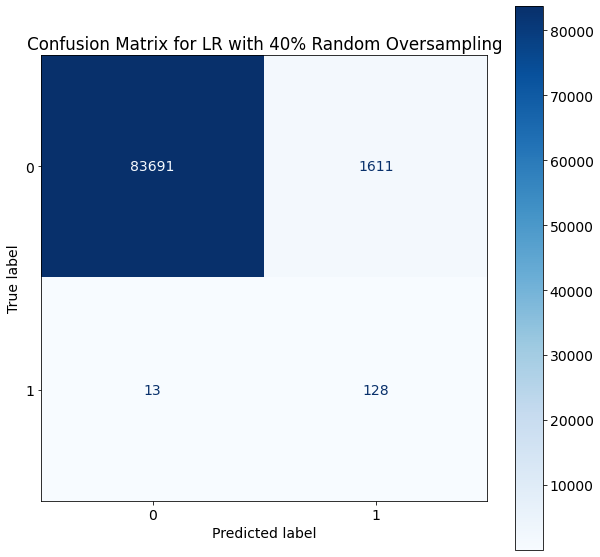

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 40% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 40% Random Oversampling

#### Precision

In [42]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.07361
0.99984
0.99832


#### Recall

In [43]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.98111
0.98099


#### F1 Score

In [44]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.13617
0.99039
0.98898


#### Classification Report

In [45]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.98111   0.99039     85302
     Class 1    0.07361   0.90780   0.13617       141

    accuracy                        0.98099     85443
   macro avg    0.53673   0.94446   0.56328     85443
weighted avg    0.99832   0.98099   0.98898     85443



### PR Curve

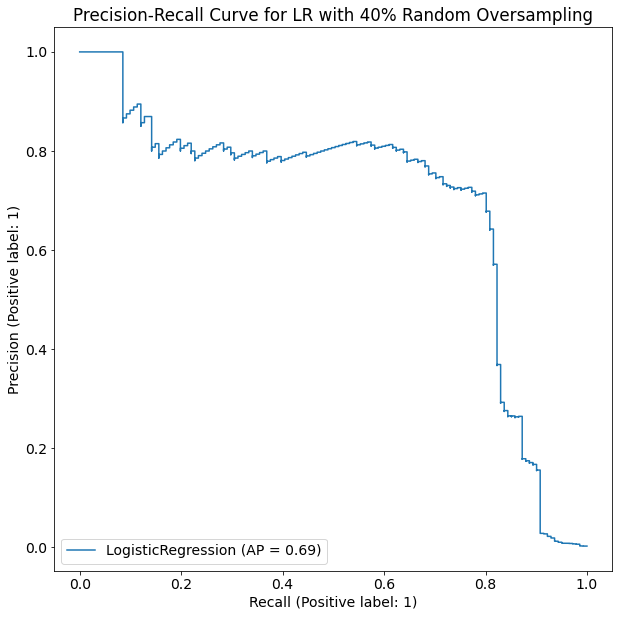

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 40% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

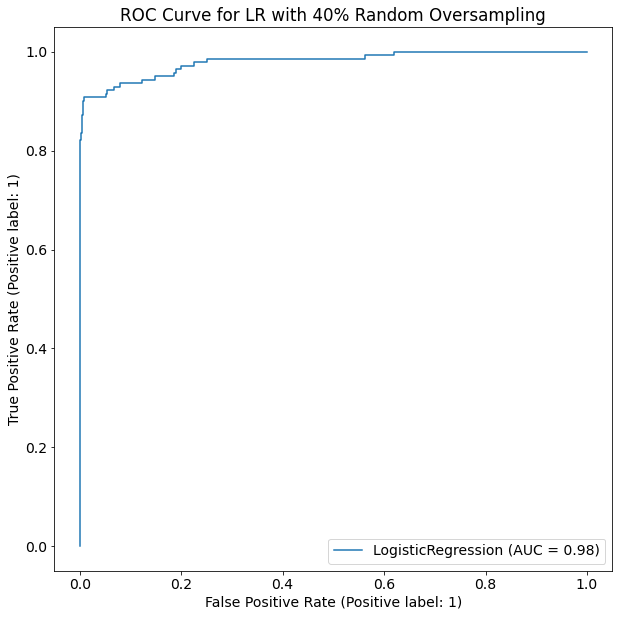

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 40% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 50% Oversampling

### Parameter Tuning using Cross-Validation

In [48]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [49]:
search_over.fit(X_over_5, y_over_5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.2s
[CV 2/10] END .........................................C=0.1; total time=   1.8s
[CV 3/10] END .........................................C=0.1; total time=   1.9s
[CV 4/10] END .........................................C=0.1; total time=   2.9s
[CV 5/10] END .........................................C=0.1; total time=   4.5s
[CV 6/10] END .........................................C=0.1; total time=   3.0s
[CV 7/10] END .........................................C=0.1; total time=   1.9s
[CV 8/10] END .........................................C=0.1; total time=   3.5s
[CV 9/10] END .........................................C=0.1; total time=   3.8s
[CV 10/10] END ........................................C=0.1; total time=   1.7s
[CV 1/10] END .........................................C=0.2; total time=   2.7s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [50]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_5, y_over_5)
y_over_pred = LR_over.predict(X_test)

0.4


### Confusion matrix for LR with 50% Random Oversampling

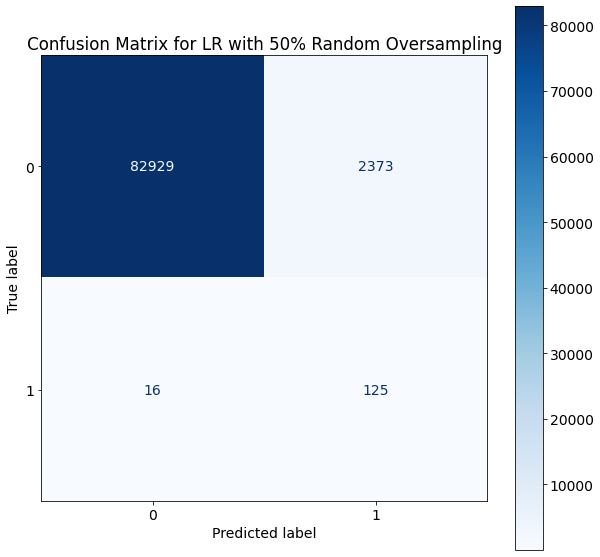

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 50% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 50% Random Oversampling

#### Precision

In [52]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.05004
0.99981
0.99824


#### Recall

In [53]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.88652
0.97218
0.97204


#### F1 Score

In [54]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.09473
0.9858
0.98433


#### Classification Report

In [55]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99981   0.97218   0.98580     85302
     Class 1    0.05004   0.88652   0.09473       141

    accuracy                        0.97204     85443
   macro avg    0.52492   0.92935   0.54027     85443
weighted avg    0.99824   0.97204   0.98433     85443



### PR Curve

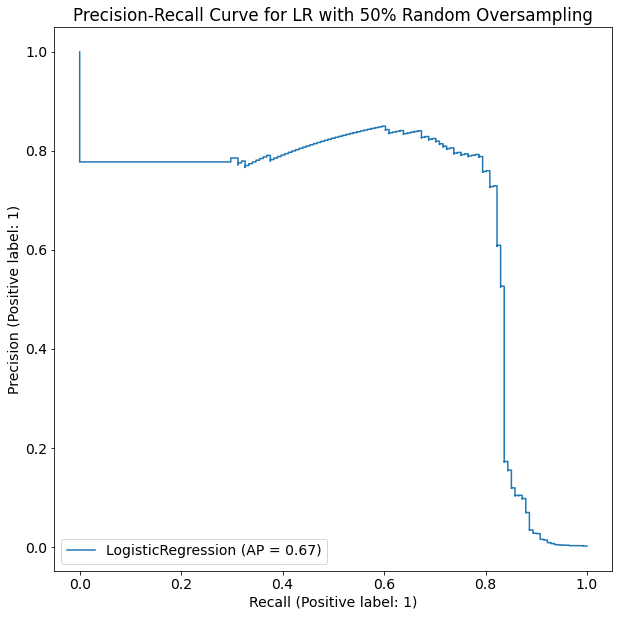

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 50% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

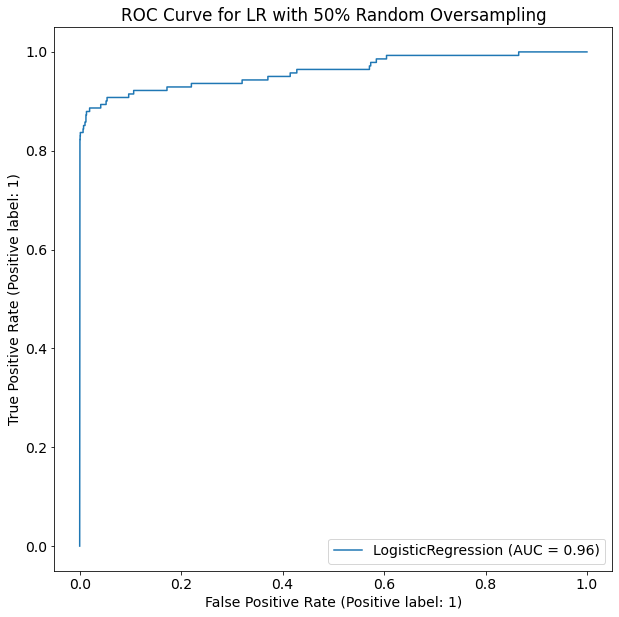

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 50% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 60% Oversampling

### Parameter Tuning using Cross-Validation

In [58]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [59]:
search_over.fit(X_over_6, y_over_6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.3s
[CV 2/10] END .........................................C=0.1; total time=   2.9s
[CV 3/10] END .........................................C=0.1; total time=   1.7s
[CV 4/10] END .........................................C=0.1; total time=   3.5s
[CV 5/10] END .........................................C=0.1; total time=   2.3s
[CV 6/10] END .........................................C=0.1; total time=   7.7s
[CV 7/10] END .........................................C=0.1; total time=   7.4s
[CV 8/10] END .........................................C=0.1; total time=   3.0s
[CV 9/10] END .........................................C=0.1; total time=   4.5s
[CV 10/10] END ........................................C=0.1; total time=   1.8s
[CV 1/10] END .........................................C=0.2; total time=   1.8s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [60]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_6, y_over_6)
y_over_pred = LR_over.predict(X_test)

1


### Confusion matrix for LR with 60% Random Oversampling

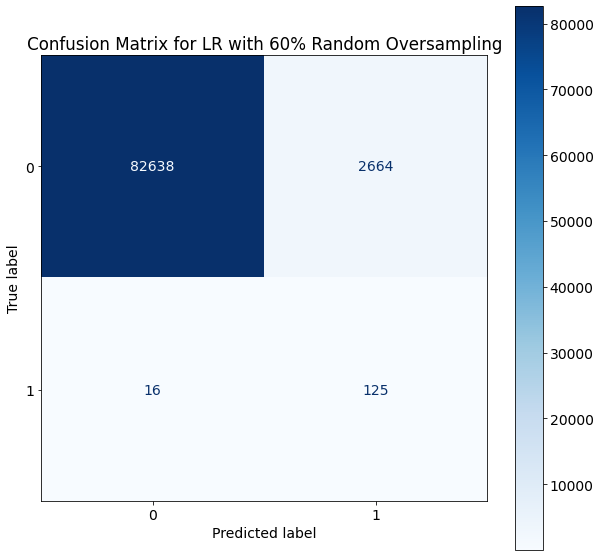

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 60% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 60% Random Oversampling

#### Precision

In [62]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.04482
0.99981
0.99823


#### Recall

In [63]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.88652
0.96877
0.96863


#### F1 Score

In [64]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.08532
0.98404
0.98256


#### Classification Report

In [65]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99981   0.96877   0.98404     85302
     Class 1    0.04482   0.88652   0.08532       141

    accuracy                        0.96863     85443
   macro avg    0.52231   0.92765   0.53468     85443
weighted avg    0.99823   0.96863   0.98256     85443



### PR Curve

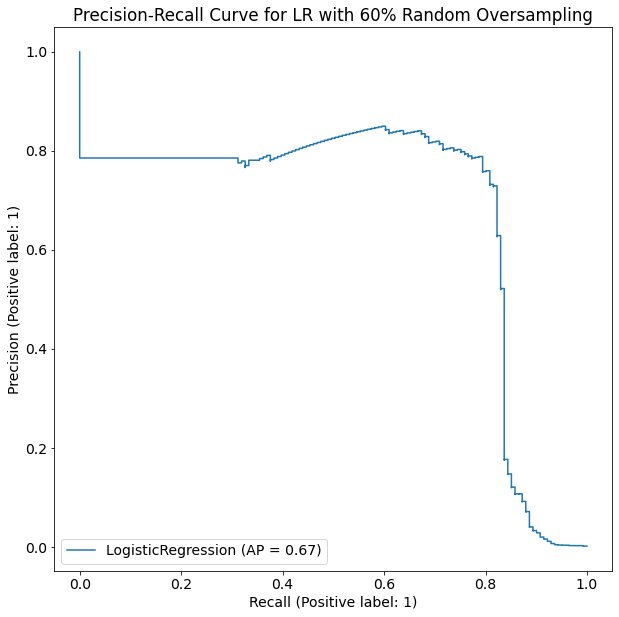

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 60% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

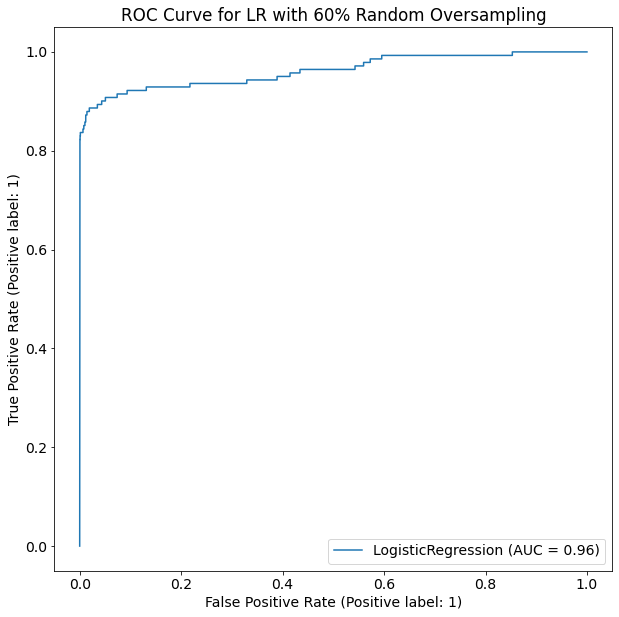

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 60% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 70% Oversampling

### Parameter Tuning using Cross-Validation

In [68]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [69]:
search_over.fit(X_over_7, y_over_7)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   3.2s
[CV 2/10] END .........................................C=0.1; total time=   1.9s
[CV 3/10] END .........................................C=0.1; total time=   3.2s
[CV 4/10] END .........................................C=0.1; total time=   3.1s
[CV 5/10] END .........................................C=0.1; total time=   3.8s
[CV 6/10] END .........................................C=0.1; total time=   2.0s
[CV 7/10] END .........................................C=0.1; total time=   3.4s
[CV 8/10] END .........................................C=0.1; total time=   3.1s
[CV 9/10] END .........................................C=0.1; total time=   3.5s
[CV 10/10] END ........................................C=0.1; total time=   3.3s
[CV 1/10] END .........................................C=0.2; total time=   2.9s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [70]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_7, y_over_7)
y_over_pred = LR_over.predict(X_test)

0.5


### Confusion matrix for LR with 70% Random Oversampling

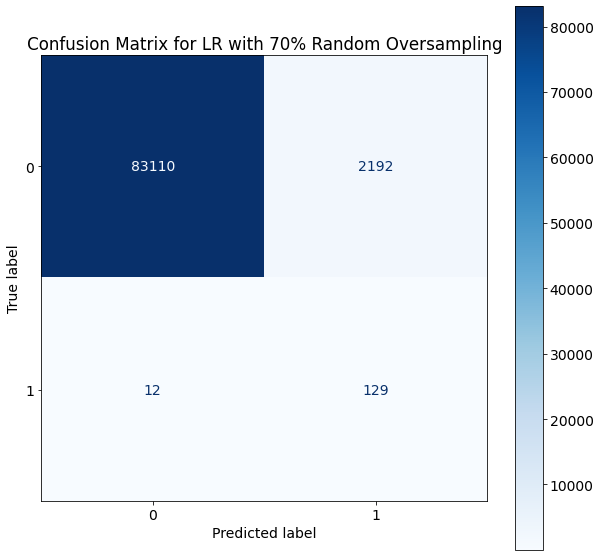

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 70% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 70% Random Oversampling

#### Precision

In [72]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.05558
0.99986
0.9983


#### Recall

In [73]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.91489
0.9743
0.97421


#### F1 Score

In [74]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.10479
0.98691
0.98546


#### Classification Report

In [75]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99986   0.97430   0.98691     85302
     Class 1    0.05558   0.91489   0.10479       141

    accuracy                        0.97421     85443
   macro avg    0.52772   0.94460   0.54585     85443
weighted avg    0.99830   0.97421   0.98546     85443



### PR Curve

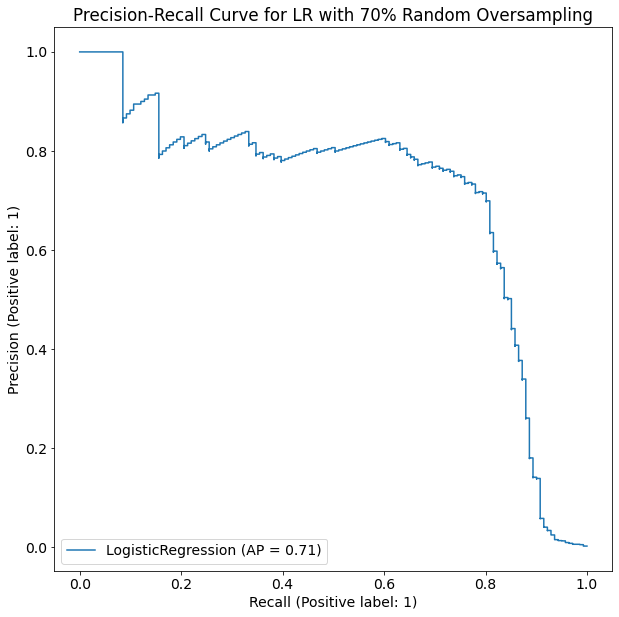

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 70% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

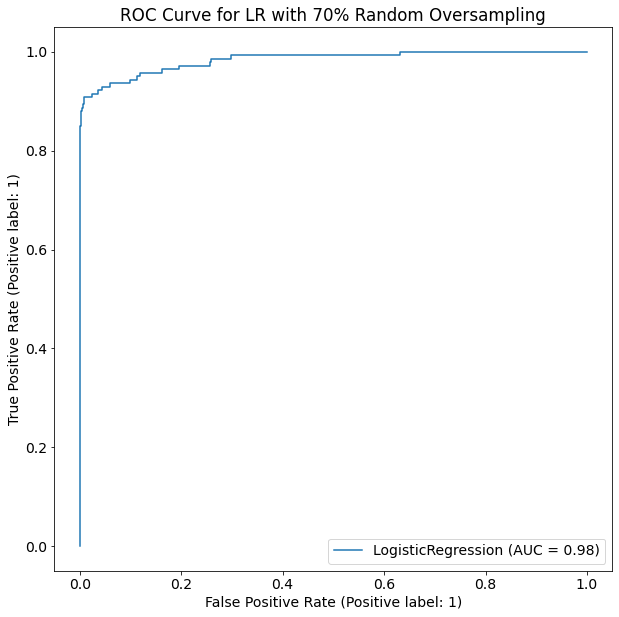

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 70% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 80% Oversampling

### Parameter Tuning using Cross-Validation

In [78]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [79]:
search_over.fit(X_over_8, y_over_8)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   3.1s
[CV 2/10] END .........................................C=0.1; total time=   2.1s
[CV 3/10] END .........................................C=0.1; total time=   4.3s
[CV 4/10] END .........................................C=0.1; total time=   2.1s
[CV 5/10] END .........................................C=0.1; total time=   2.0s
[CV 6/10] END .........................................C=0.1; total time=   2.1s
[CV 7/10] END .........................................C=0.1; total time=   2.3s
[CV 8/10] END .........................................C=0.1; total time=   1.9s
[CV 9/10] END .........................................C=0.1; total time=   1.8s
[CV 10/10] END ........................................C=0.1; total time=   1.9s
[CV 1/10] END .........................................C=0.2; total time=   1.9s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [80]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_8, y_over_8)
y_over_pred = LR_over.predict(X_test)

0.1


### Confusion matrix for LR with 80% Random Oversampling

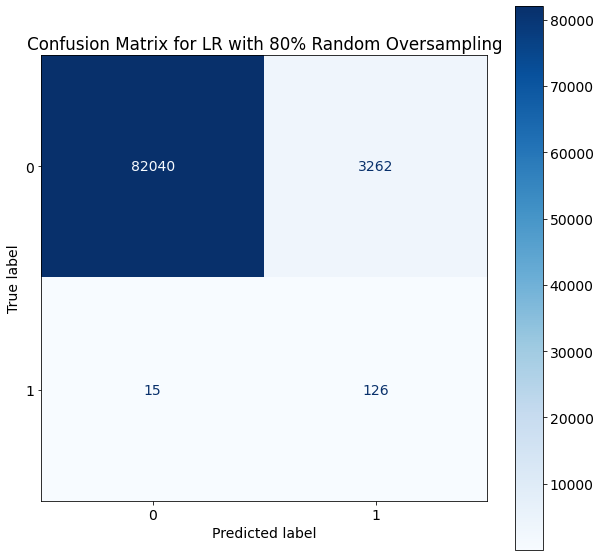

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 80% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 80% Random Oversampling

#### Precision

In [82]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.03719
0.99982
0.99823


#### Recall

In [83]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.89362
0.96176
0.96165


#### F1 Score

In [84]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07141
0.98042
0.97892


#### Classification Report

In [85]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99982   0.96176   0.98042     85302
     Class 1    0.03719   0.89362   0.07141       141

    accuracy                        0.96165     85443
   macro avg    0.51850   0.92769   0.52591     85443
weighted avg    0.99823   0.96165   0.97892     85443



### PR Curve

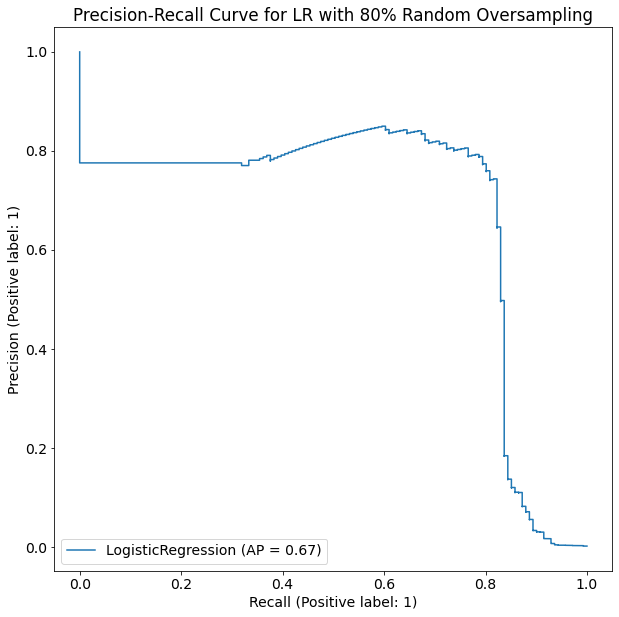

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 80% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

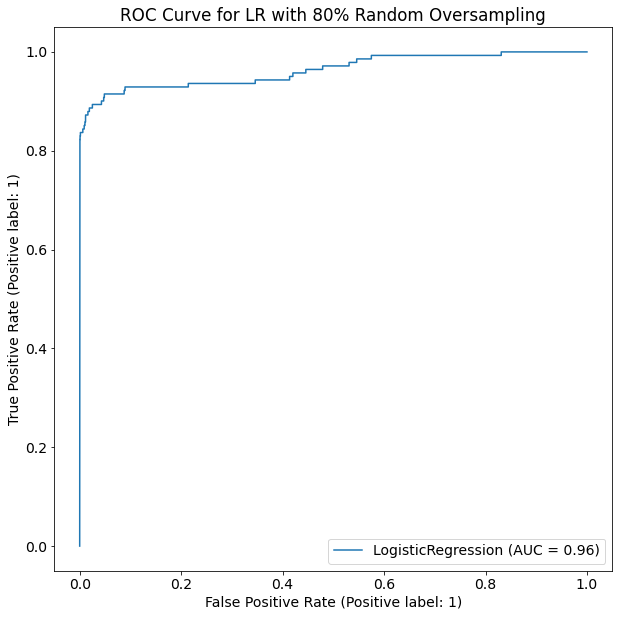

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 80% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 90% Oversampling

### Parameter Tuning using Cross-Validation

In [88]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [89]:
search_over.fit(X_over_9, y_over_9)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   4.2s
[CV 2/10] END .........................................C=0.1; total time=   6.3s
[CV 3/10] END .........................................C=0.1; total time=   3.7s
[CV 4/10] END .........................................C=0.1; total time=   4.2s
[CV 5/10] END .........................................C=0.1; total time=   4.3s
[CV 6/10] END .........................................C=0.1; total time=   2.7s
[CV 7/10] END .........................................C=0.1; total time=   4.3s
[CV 8/10] END .........................................C=0.1; total time=   3.7s
[CV 9/10] END .........................................C=0.1; total time=   4.5s
[CV 10/10] END ........................................C=0.1; total time=   1.9s
[CV 1/10] END .........................................C=0.2; total time=   3.8s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [90]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over_9, y_over_9)
y_over_pred = LR_over.predict(X_test)

0.4


### Confusion matrix for LR with 90% Random Oversampling

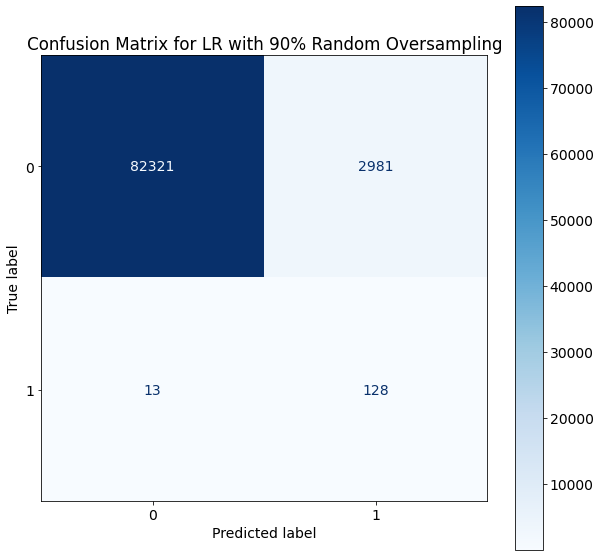

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 90% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 90% Random Oversampling

#### Precision

In [92]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.04117
0.99984
0.99826


#### Recall

In [93]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.9078
0.96505
0.96496


#### F1 Score

In [94]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07877
0.98214
0.98065


#### Classification Report

In [95]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99984   0.96505   0.98214     85302
     Class 1    0.04117   0.90780   0.07877       141

    accuracy                        0.96496     85443
   macro avg    0.52051   0.93643   0.53045     85443
weighted avg    0.99826   0.96496   0.98065     85443



### PR Curve

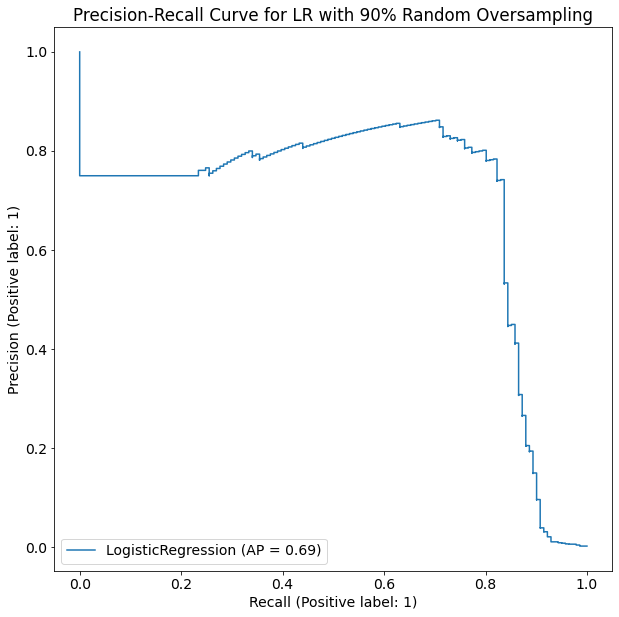

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 90% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

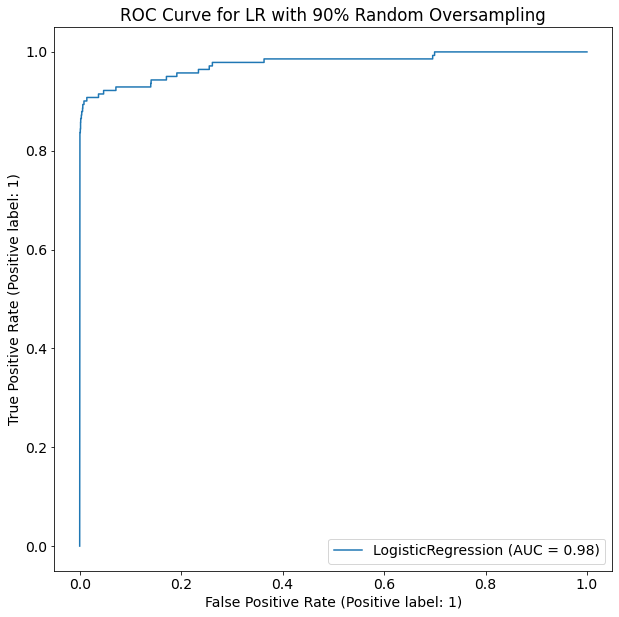

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 90% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

## 1000% Oversampling

### Parameter Tuning using Cross-Validation

In [98]:
clf = LogisticRegression(max_iter=1000)
search_over = GridSearchCV(clf,PARAM, cv=10, verbose=3)

In [99]:
search_over.fit(X_over, y_over)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .........................................C=0.1; total time=   2.9s
[CV 2/10] END .........................................C=0.1; total time=   3.5s
[CV 3/10] END .........................................C=0.1; total time=   3.5s
[CV 4/10] END .........................................C=0.1; total time=   8.3s
[CV 5/10] END .........................................C=0.1; total time=   2.3s
[CV 6/10] END .........................................C=0.1; total time=  10.5s
[CV 7/10] END .........................................C=0.1; total time=   3.6s
[CV 8/10] END .........................................C=0.1; total time=   6.0s
[CV 9/10] END .........................................C=0.1; total time=   6.2s
[CV 10/10] END ........................................C=0.1; total time=   3.3s
[CV 1/10] END .........................................C=0.2; total time=   2.3s
[CV 2/10] END ................................

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1]},
             verbose=3)

In [100]:
best_C = search_over.best_params_['C']
print(best_C)
LR_over = LogisticRegression(C=best_C, max_iter= 1000)
LR_over.fit(X_over, y_over)
y_over_pred = LR_over.predict(X_test)

0.1


### Confusion matrix for LR with 100% Random Oversampling

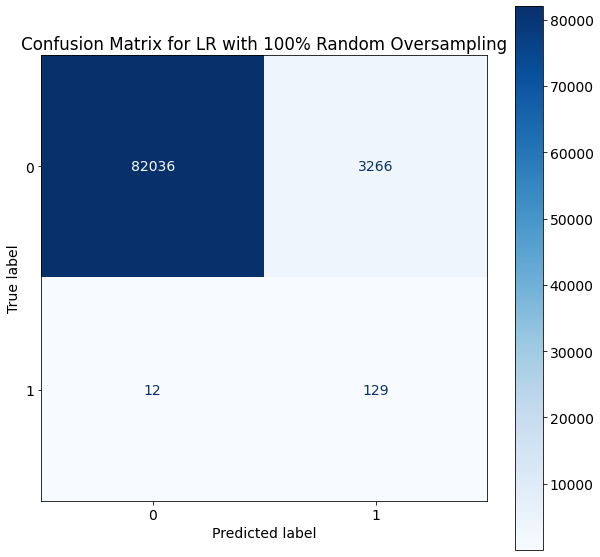

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with 100% Random Oversampling')
plot_confusion_matrix(LR_over, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

### Precision, Recall, F1 score for LR with 100% Random Oversampling

#### Precision

In [102]:
precision_LR_random_over_1 = round(precision_score(y_test, y_over_pred, pos_label=1),5)
print(precision_LR_random_over_1)
precision_LR_random_over_0 = round(precision_score(y_test, y_over_pred, pos_label=0),5)
print(precision_LR_random_over_0)
precision_LR_random_over_avg = round(precision_score(y_test, y_over_pred, average='weighted'),5)
print(precision_LR_random_over_avg)

0.038
0.99985
0.99827


#### Recall

In [103]:
recall_LR_random_over_1 = round(recall_score(y_test, y_over_pred, pos_label=1),5)
print(recall_LR_random_over_1)
recall_LR_random_over_0 = round(recall_score(y_test, y_over_pred, pos_label=0),5)
print(recall_LR_random_over_0)
recall_LR_random_over_avg = round(recall_score(y_test, y_over_pred, average='weighted'),5)
print(recall_LR_random_over_avg)

0.91489
0.96171
0.96164


#### F1 Score

In [104]:
f1_LR_random_over_1 = round(f1_score(y_test, y_over_pred),5)
print(f1_LR_random_over_1)
f1_LR_random_over_0 = round(f1_score(y_test, y_over_pred, pos_label=0),5)
print(f1_LR_random_over_0)
f1_LR_random_over_avg = round(f1_score(y_test, y_over_pred, average='weighted'),5)
print(f1_LR_random_over_avg)

0.07296
0.98041
0.97891


#### Classification Report

In [105]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_over_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.96171   0.98041     85302
     Class 1    0.03800   0.91489   0.07296       141

    accuracy                        0.96164     85443
   macro avg    0.51893   0.93830   0.52669     85443
weighted avg    0.99827   0.96164   0.97891     85443



### PR Curve

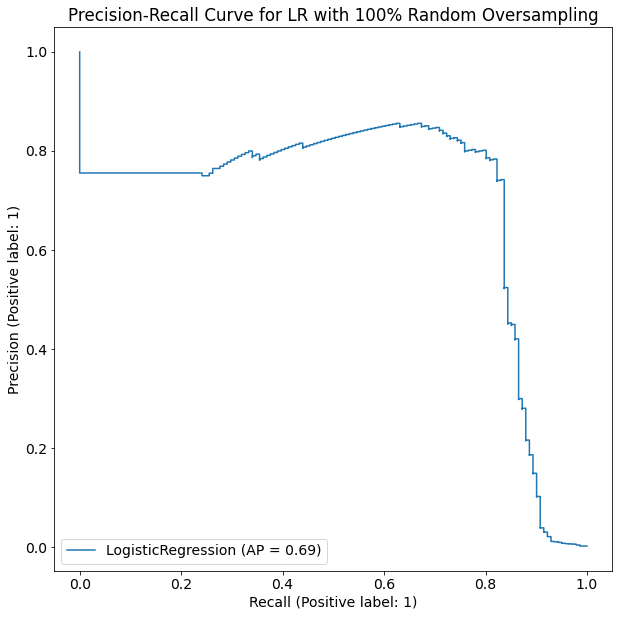

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Precision-Recall Curve for LR with 100% Random Oversampling')
plot_precision_recall_curve(LR_over, X_test, y_test, ax=ax)

### ROC Curve

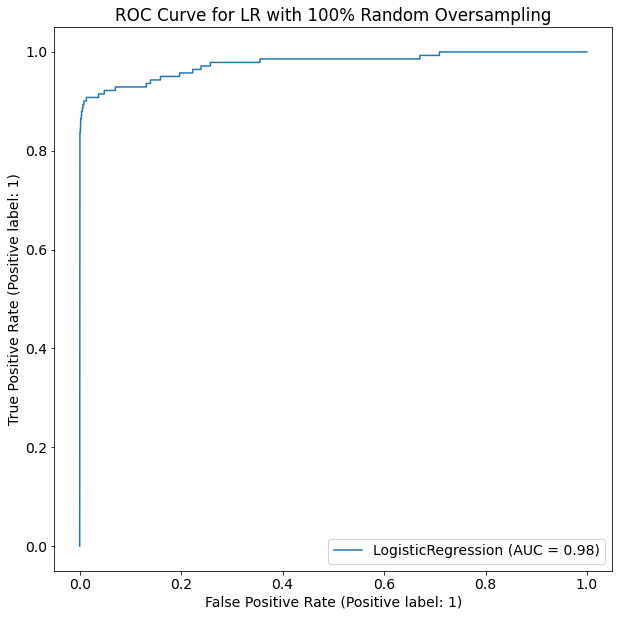

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('ROC Curve for LR with 100% Random Oversampling')
plot_roc_curve(LR_over, X_test, y_test, ax=ax)

# Logistic Regression with Random Undersampling

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_under = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_under.fit(X_under,y_under)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.958, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.930, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.929, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.871, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.900, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, score=0.929, total=   0.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.957, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.930, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.915, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.914, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.929, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] ............................... C=0.2, score=0.914, total=   0.0s
[CV] C=0.2 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_under.best_params_['C']
print(best_C)
LR_under = LogisticRegression(C=best_C, max_iter=1000, verbose=3)
LR_under.fit(X_under, y_under)
y_under_pred = LR_under.predict(X_test)

0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Confusion matrix for LR with Random Undersampling

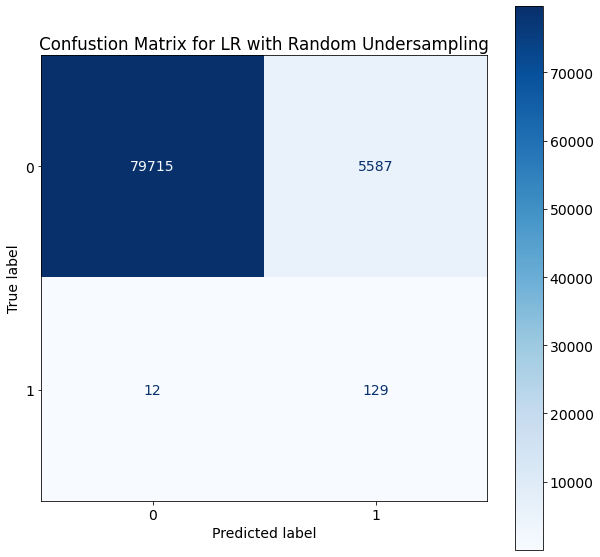

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confustion Matrix for LR with Random Undersampling')
plot_confusion_matrix(LR_under, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Random Undersampling

### Precision

In [ ]:
precision_LR_random_under_1 = round(precision_score(y_test, y_under_pred, pos_label=1),5)
print(precision_LR_random_under_1)
precision_LR_random_under_0 = round(precision_score(y_test, y_under_pred, pos_label=0),5)
print(precision_LR_random_under_0)
precision_LR_random_under_avg = round(precision_score(y_test, y_under_pred, average='weighted'),5)
print(precision_LR_random_under_avg)

0.02257
0.99985
0.99824


### Recall

In [ ]:
recall_LR_random_under_1 = round(recall_score(y_test, y_under_pred, pos_label=1),5)
print(recall_LR_random_under_1)
recall_LR_random_under_0 = round(recall_score(y_test, y_under_pred, pos_label=0),5)
print(recall_LR_random_under_0)
recall_LR_random_under_avg = round(recall_score(y_test, y_under_pred, average='weighted'),5)
print(recall_LR_random_under_avg)

0.91489
0.9345
0.93447


### F1 Score

In [ ]:
f1_LR_random_under_1 = round(f1_score(y_test, y_under_pred, pos_label=1),5)
print(f1_LR_random_under_1)
f1_LR_random_under_0 = round(f1_score(y_test, y_under_pred, pos_label=0),5)
print(f1_LR_random_under_0)
f1_LR_random_under_avg = round(f1_score(y_test, y_under_pred, average='weighted'),5)
print(f1_LR_random_under_avg)

0.04405
0.96607
0.96455


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_under_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99985   0.93450   0.96607     85302
     Class 1    0.02257   0.91489   0.04405       141

    accuracy                        0.93447     85443
   macro avg    0.51121   0.92470   0.50506     85443
weighted avg    0.99824   0.93447   0.96455     85443



## PR Curve

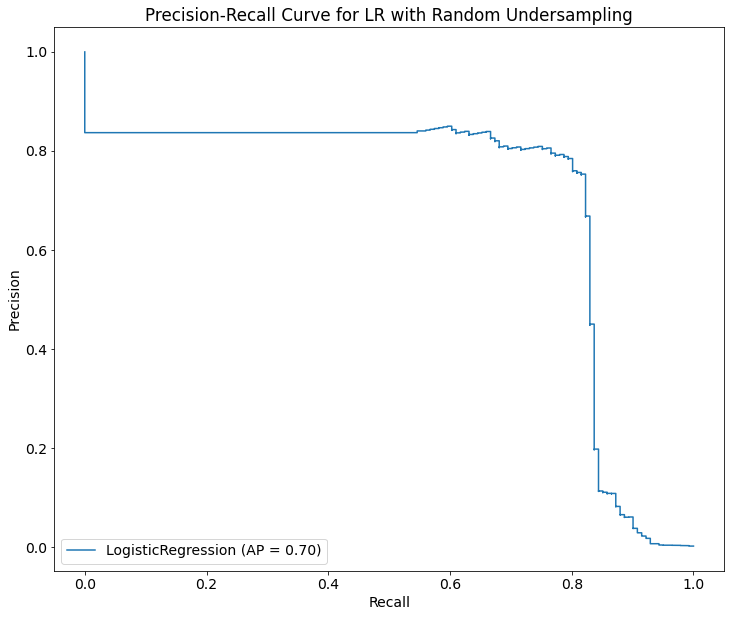

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Precision-Recall Curve for LR with Random Undersampling')
plot_precision_recall_curve(LR_under, X_test, y_test, ax=ax)

## ROC Curve

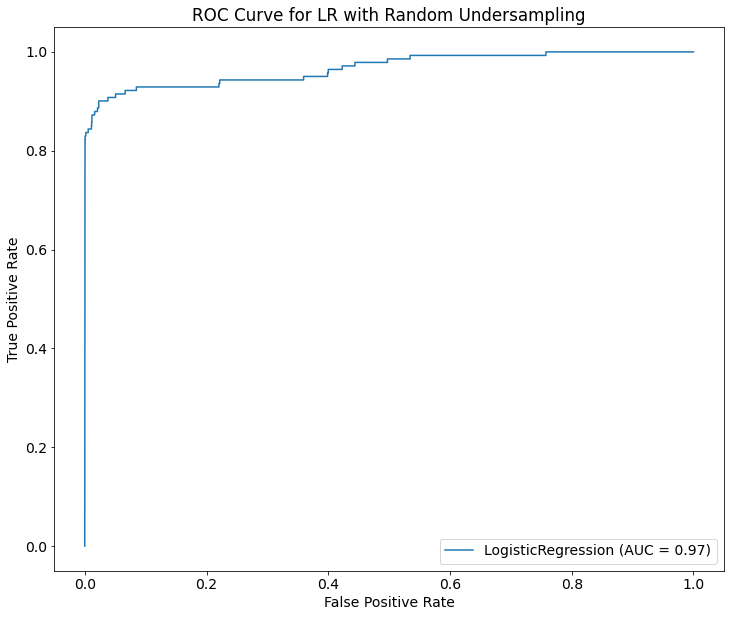

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Random Undersampling')
plot_roc_curve(LR_under, X_test, y_test, ax=ax)

# Logistic Regression with SMOTE

## Parameter Tuning using Cross-Validation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.989, total=   8.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV] ............................... C=0.1, score=0.991, total=   5.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.987, total=   2.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.991, total=   5.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.990, total=   5.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.987, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.990, total=   5.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.987, total=   2.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.990, total=   3.9s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.6min finished


0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.983, total=   4.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ............................... C=0.1, score=0.982, total=   3.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.982, total=   3.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.988, total=   8.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.981, total=   3.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.985, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.983, total=   3.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.982, total=   3.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.984, total=   4.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.1min finished


1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.981, total=   7.9s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.980, total=   3.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


[CV] ............................... C=0.1, score=0.979, total=   3.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.984, total=   7.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.967, total=   2.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.981, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.983, total=  10.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.984, total=   6.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.982, total=   8.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.2min finished


0.30000000000000004


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.980, total=   7.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV] ............................... C=0.1, score=0.977, total=   3.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s


[CV] ............................... C=0.1, score=0.978, total=   5.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   3.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   6.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   5.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.979, total=   5.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.979, total=   3.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.977, total=   5.4s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.7min finished


0.7000000000000001


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.962, total=   2.6s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ............................... C=0.1, score=0.978, total=   5.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.980, total=   8.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   3.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   6.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.980, total=   8.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   5.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.977, total=   5.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.5min finished


1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.974, total=   4.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ............................... C=0.1, score=0.979, total=   7.4s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.4s remaining:    0.0s


[CV] ............................... C=0.1, score=0.959, total=   2.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   5.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.960, total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=   5.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   9.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.8min finished


1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.975, total=   6.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.973, total=   4.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s


[CV] ............................... C=0.1, score=0.973, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   6.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.3s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=   8.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   4.3s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished


0.1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.974, total=   6.9s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ............................... C=0.1, score=0.977, total=   8.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.973, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.978, total=  11.5s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=  10.1s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.977, total=   8.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.974, total=   6.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.976, total=  11.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.977, total=   9.6s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.6min finished


0.8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.957, total=   2.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ............................... C=0.1, score=0.973, total=   4.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV] ............................... C=0.1, score=0.972, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.977, total=  11.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   6.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   3.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.974, total=   6.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   6.2s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.0min finished


0.8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.975, total=  11.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.972, total=   5.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


[CV] ............................... C=0.1, score=0.976, total=   9.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   5.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.975, total=   9.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.958, total=   3.1s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.0min finished


1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished


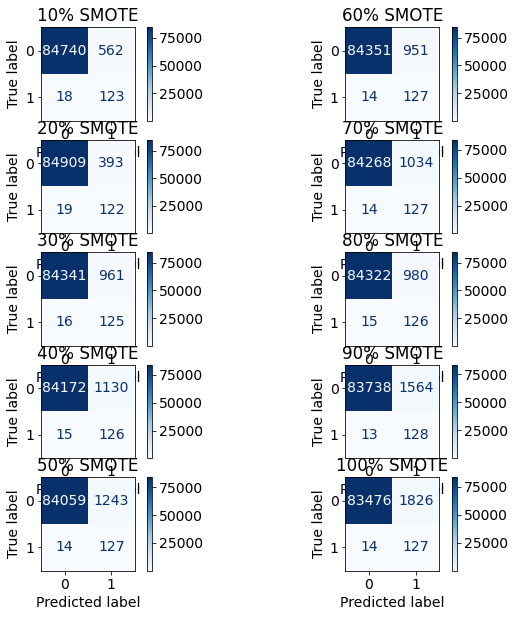

In [24]:
fig, axs = plt.subplots(5,2,figsize=(10, 10))
for i in range (10):
  percentage = (i+1)/10
  smote = SMOTE(sampling_strategy=percentage, random_state=14)
  X_smote, y_smote = smote.fit_resample(X_train,y_train)
  clf = LogisticRegression(max_iter=10000)
  search_smote = GridSearchCV(clf,PARAM,cv=10, verbose=3)
  search_smote.fit(X_smote, y_smote)
  best_C = search_smote.best_params_['C']
  print(best_C)
  LR_smote = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
  LR_smote.fit(X_smote, y_smote)
  y_smote_pred = LR_smote.predict(X_test)
  axs[i%5,i//5].title.set_text('{}% SMOTE'.format((i+1)*10))
  plot_confusion_matrix(LR_smote, X_test, y_test, cmap='Blues', ax=axs[i%5,i//5], values_format='d')
plt.show()

## Confusion matrix for LR with SMOTE

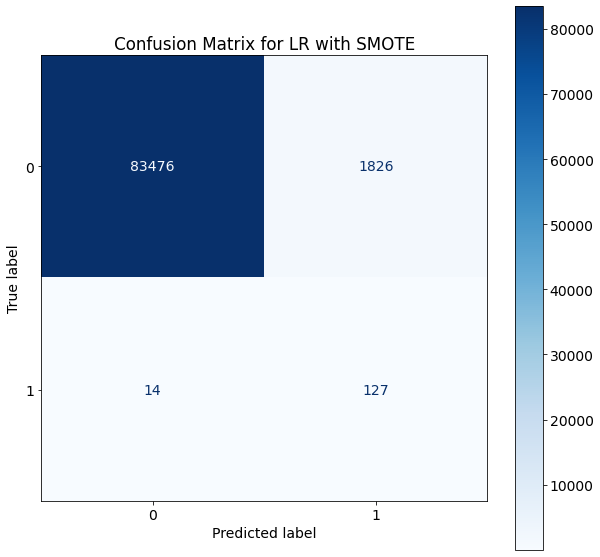

## Precision, Recall, F1 score for LR with SMOTE

### Precision

In [ ]:
precision_LR_smote_1 = round(precision_score(y_test,y_smote_pred,pos_label=1),5)
print(precision_LR_smote_1)
precision_LR_smote_0 = round(precision_score(y_test,y_smote_pred,pos_label=0),5)
print(precision_LR_smote_0)
precision_LR_smote_avg = round(precision_score(y_test,y_smote_pred, average='weighted'),5)
print(precision_LR_smote_avg)

0.06503
0.99983
0.99829


### Recall

In [ ]:
recall_LR_smote_1 = round(recall_score(y_test,y_smote_pred,pos_label=1),5)
print(recall_LR_smote_1)
recall_LR_smote_0 = round(recall_score(y_test,y_smote_pred,pos_label=0),5)
print(recall_LR_smote_0)
recall_LR_smote_avg = round(recall_score(y_test,y_smote_pred, average='weighted'),5)
print(recall_LR_smote_avg)

0.90071
0.97859
0.97847


### F1 Score

In [ ]:
f1_LR_smote_1 = round(f1_score(y_test,y_smote_pred,pos_label=1),5)
print(f1_LR_smote_1)
f1_LR_smote_0 = round(f1_score(y_test,y_smote_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_smote_avg = round(f1_score(y_test,y_smote_pred, average='weighted'),5)
print(f1_LR_smote_avg)

0.1213
0.9891
0.98767


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_smote_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97859   0.98910     85302
     Class 1    0.06503   0.90071   0.12130       141

    accuracy                        0.97847     85443
   macro avg    0.53243   0.93965   0.55520     85443
weighted avg    0.99829   0.97847   0.98767     85443



## PR Curve

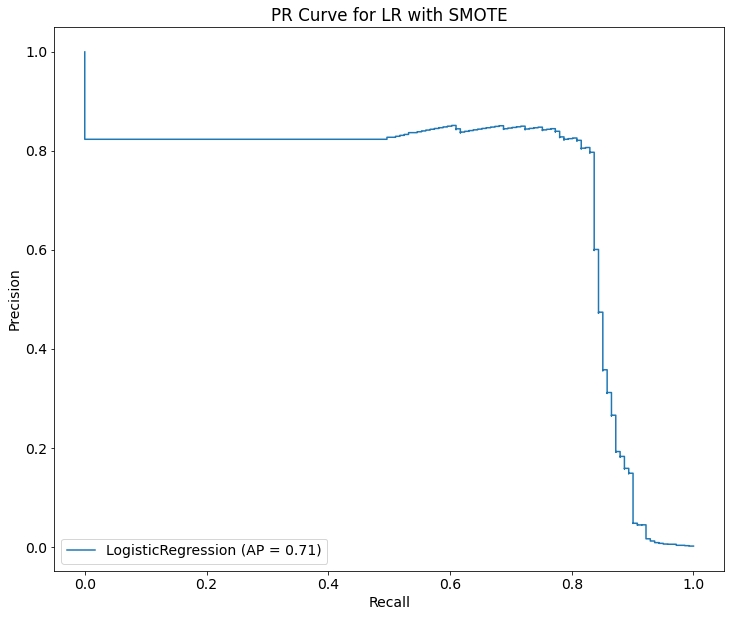

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with SMOTE')
plot_precision_recall_curve(LR_smote,X_test, y_test, ax=ax)

## ROC Curve

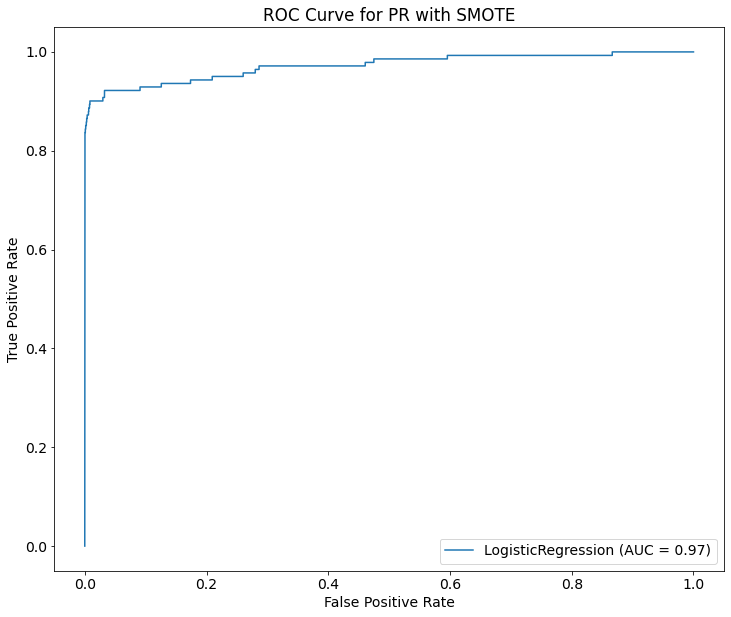

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for PR with SMOTE')
plot_roc_curve(LR_smote, X_test, y_test, ax=ax)

# Logistic Regression with Tomek Links Removal

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_tomek = GridSearchCV(clf, PARAM, cv=10, verbose=3)

In [ ]:
search_tomek.fit(X_tomek, y_tomek)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.999, total=  11.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  13.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.3s remaining:    0.0s


[CV] ............................... C=0.1, score=0.999, total=  13.7s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  11.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=  16.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   6.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.999, total=   7.8s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_tomek.best_params_['C']
print(best_C)

0.4


In [ ]:
LR_tomek = LogisticRegression(C=best_C, max_iter=10000, verbose=3)
LR_tomek.fit(X_tomek, y_tomek)
y_tomek_pred = LR_tomek.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s finished


## Confusion matrix for LR with Tomek Links Removal

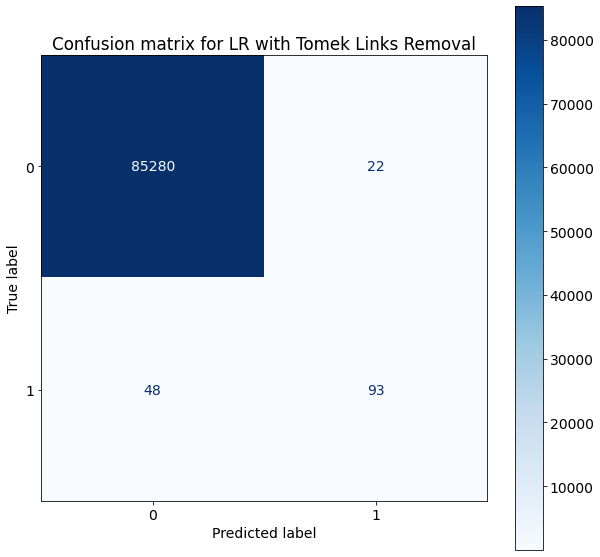

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Confusion matrix for LR with Tomek Links Removal")
plot_confusion_matrix(LR_tomek, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

## Precision, Recall, F1 score for LR with Tomek Links Removal

### Precision

In [ ]:
precision_LR_tomek_1 = round(precision_score(y_test,y_tomek_pred,pos_label=1),5)
print(precision_LR_tomek_1)
precision_LR_tomek_0 = round(precision_score(y_test,y_tomek_pred,pos_label=0),5)
print(precision_LR_tomek_0)
precision_LR_avg = round(precision_score(y_test,y_tomek_pred,average='weighted'),5)
print(precision_LR_avg)

0.8087
0.99944
0.99912


### Recall

In [ ]:
recall_LR_tomek_1 = round(recall_score(y_test,y_tomek_pred,pos_label=1),5)
print(recall_LR_tomek_1)
recall_LR_tomek_0 = round(recall_score(y_test,y_tomek_pred,pos_label=0),5)
print(recall_LR_tomek_0)
recall_LR_avg = round(recall_score(y_test,y_tomek_pred,average='weighted'),5)
print(recall_LR_avg)

0.65957
0.99974
0.99918


### F1 Score

In [ ]:
f1_LR_tomek_1 = round(f1_score(y_test,y_tomek_pred,pos_label=1),5)
print(f1_LR_tomek_1)
f1_LR_tomek_0 = round(f1_score(y_test,y_tomek_pred,pos_label=0),5)
print(f1_LR_smote_0)
f1_LR_avg = round(f1_score(y_test,y_tomek_pred,average='weighted'),5)
print(f1_LR_avg)

0.72656
0.9891
0.99914


### Classification Report

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_tomek_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99944   0.99974   0.99959     85302
     Class 1    0.80870   0.65957   0.72656       141

    accuracy                        0.99918     85443
   macro avg    0.90407   0.82966   0.86308     85443
weighted avg    0.99912   0.99918   0.99914     85443



## PR Curve

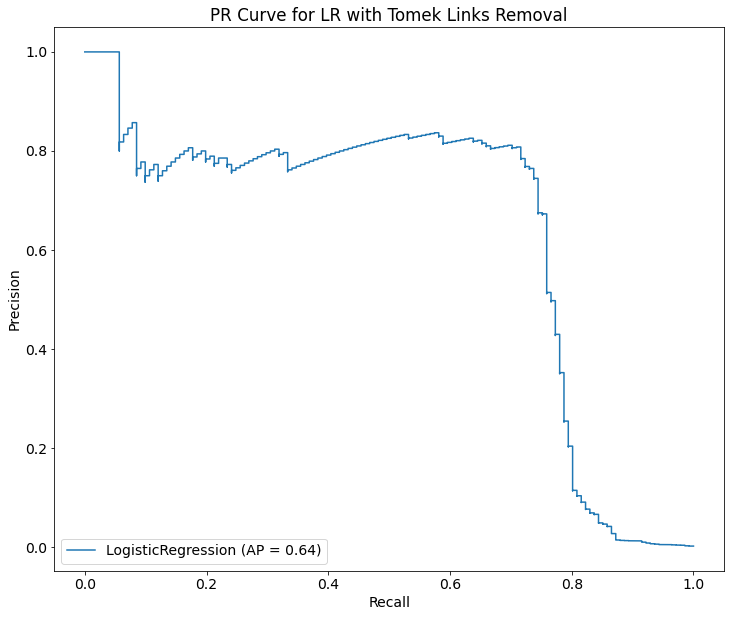

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Tomek Links Removal')
plot_precision_recall_curve(LR_tomek, X_test, y_test, ax=ax)

## ROC Curve

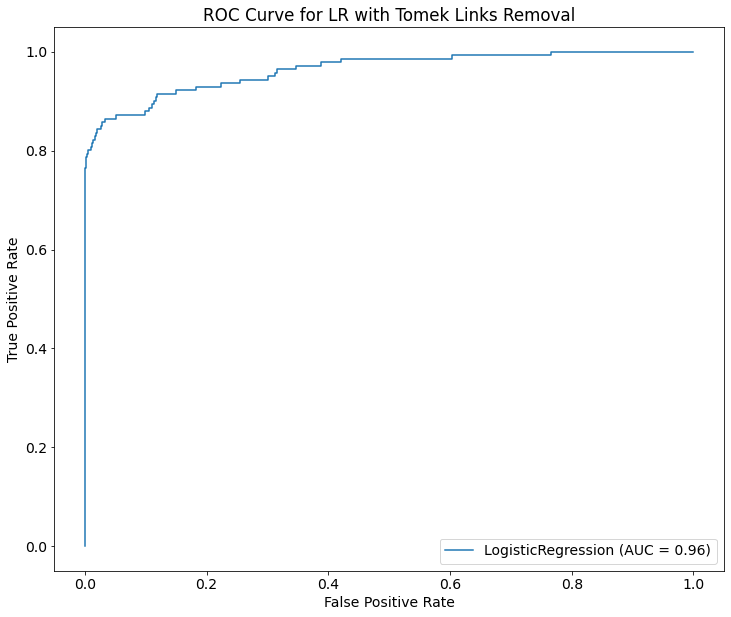

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Tomek Links Removal')
plot_roc_curve(LR_tomek, X_test, y_test, ax=ax)

# Logistic Regression with Hybrid

## Parameter Tuning using Cross-Validation

In [ ]:
clf = LogisticRegression(max_iter=10000)
search_hybrid = GridSearchCV(clf, PARAM, cv=10, verbose=3)
search_hybrid.fit(X_hybrid, y_hybrid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.971, total=   4.8s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] ............................... C=0.1, score=0.974, total=   8.3s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.972, total=   4.9s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.6s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   5.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.971, total=   4.4s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   5.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.973, total=   4.8s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.972, total=   4.7s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_C = search_hybrid.best_params_['C']
print(best_C)
LR_hybrid = LogisticRegression(C=best_C, max_iter=1000, verbose=2)
LR_hybrid.fit(X_hybrid,y_hybrid)
y_hybrid_pred = LR_hybrid.predict(X_test)

0.7000000000000001


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


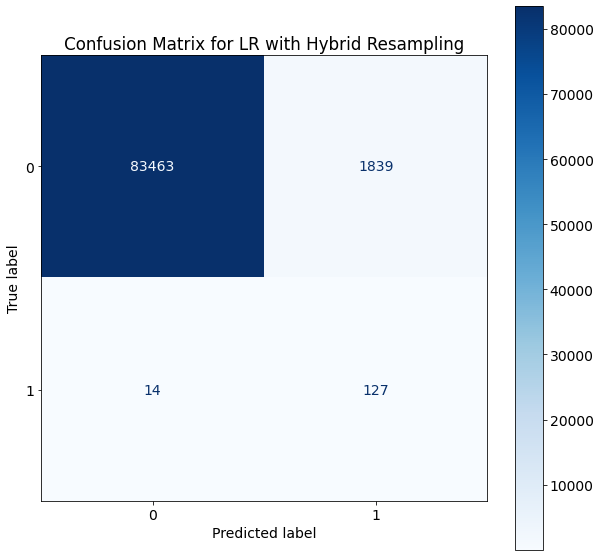

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for LR with Hybrid Resampling')
plot_confusion_matrix(LR_hybrid, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

In [ ]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_hybrid_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99983   0.97844   0.98902     85302
     Class 1    0.06460   0.90071   0.12055       141

    accuracy                        0.97831     85443
   macro avg    0.53222   0.93958   0.55479     85443
weighted avg    0.99829   0.97831   0.98759     85443



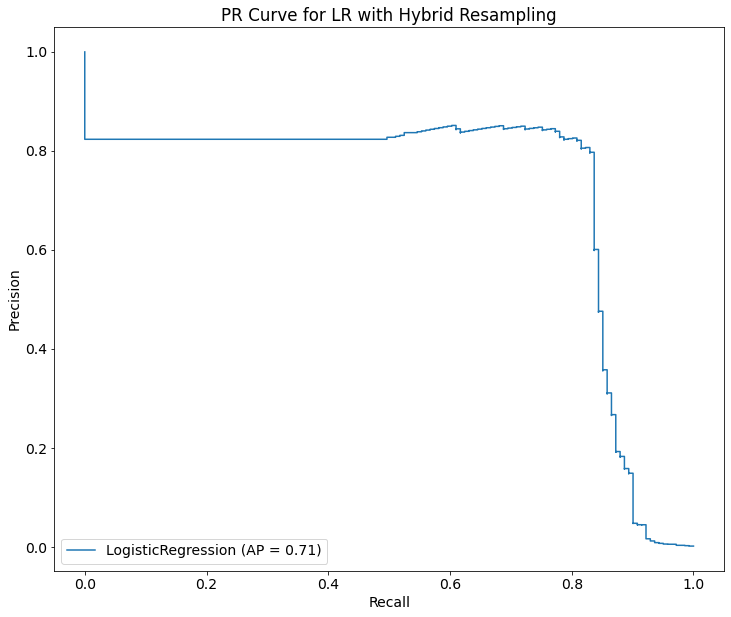

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for LR with Hybrid Resampling')
plot_precision_recall_curve(LR_hybrid, X_test, y_test, ax=ax)

# ROC Curve for LR with Hybrid Resampling

NameError: name 'LR_hybrid' is not defined

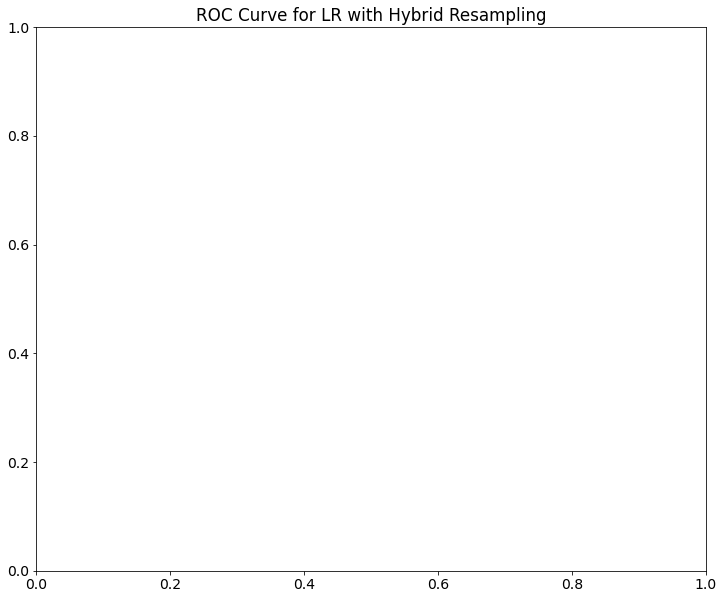

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for LR with Hybrid Resampling')
plot_roc_curve(LR_hybrid, X_test, y_test, ax=ax)

# Random Forest with No Resampling

## Parameter Tuning using Cross-Validation

In [15]:
RF_PARAM = PARAM = {'n_estimators':[100,150,200,250,300,350,400,450,500]}

In [16]:
clf = RandomForestClassifier(random_state=14)
search = GridSearchCV(clf, RF_PARAM, cv=10, verbose=3)

In [17]:
search.fit(X_train, np.ravel(y_train))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............................n_estimators=100; total time= 3.4min
[CV 2/10] END ..............................n_estimators=100; total time= 3.0min
[CV 3/10] END ..............................n_estimators=100; total time= 2.6min
[CV 4/10] END ..............................n_estimators=100; total time= 2.6min
[CV 5/10] END ..............................n_estimators=100; total time= 2.3min
[CV 6/10] END ..............................n_estimators=100; total time= 2.5min
[CV 7/10] END ..............................n_estimators=100; total time= 2.4min
[CV 8/10] END ..............................n_estimators=100; total time= 2.9min
[CV 9/10] END ..............................n_estimators=100; total time= 2.9min
[CV 10/10] END .............................n_estimators=100; total time= 3.0min
[CV 1/10] END ..............................n_estimators=150; total time= 4.4min
[CV 2/10] END ..............................n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=14),
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=3)

In [28]:
best_n_estimator = search.best_params_['n_estimators']
print(best_n_estimator)
RF = RandomForestClassifier(n_estimators=best_n_estimator, verbose=2)
RF.fit(X_train, y_train)
y_RF_pred = RF.predict(X_test)

250
building tree 1 of 250


<ipython-input-28-fa4c420ed775>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  7.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.4s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.5s finished


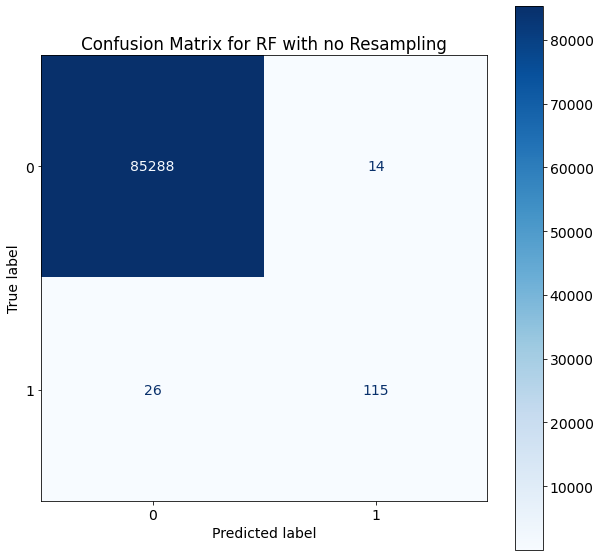

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix for RF with no Resampling')
plot_confusion_matrix(RF, X_test, y_test, cmap='Blues', ax=ax, values_format='d')

In [30]:
precision_RF_1 = round(precision_score(y_test,y_RF_pred,pos_label=1),5)
print(precision_RF_1)
precision_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(precision_RF_0)
precision_RF_avg = round(precision_score(y_test,y_RF_pred,average='weighted'),5)
print(precision_RF_avg)

0.89147
0.9997
0.99952


In [31]:
recall_RF_1 = round(recall_score(y_test,y_RF_pred,pos_label=1),5)
print(recall_RF_1)
recall_RF_0 = round(recall_score(y_test,y_RF_pred,pos_label=0),5)
print(recall_RF_0)
recall_RF_avg = round(recall_score(y_test,y_RF_pred,average='weighted'),5)
print(recall_RF_avg)

0.8156
0.99984
0.99953


In [32]:
f1_RF_1 = round(f1_score(y_test,y_RF_pred,pos_label=1),5)
print(f1_RF_1)
f1_RF_0 = round(precision_score(y_test,y_RF_pred,pos_label=0),5)
print(f1_RF_0)
f1_RF_avg = round(f1_score(y_test,y_RF_pred,average='weighted'),5)
print(f1_RF_avg)

0.85185
0.9997
0.99952


In [33]:
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, y_RF_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0    0.99970   0.99984   0.99977     85302
     Class 1    0.89147   0.81560   0.85185       141

    accuracy                        0.99953     85443
   macro avg    0.94558   0.90772   0.92581     85443
weighted avg    0.99952   0.99953   0.99952     85443



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.5s finished


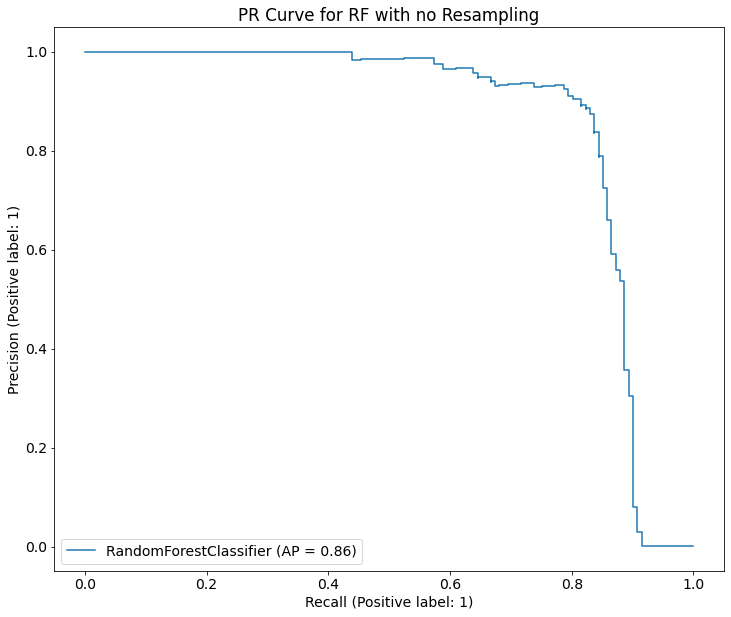

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('PR Curve for RF with no Resampling')
plot_precision_recall_curve(RF, X_test, y_test, ax=ax)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.7s finished


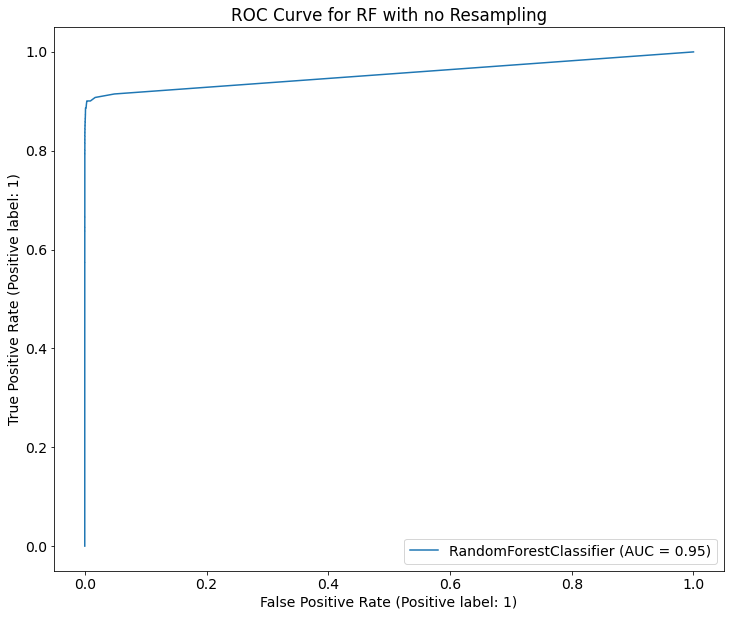

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('ROC Curve for RF with no Resampling')
plot_roc_curve(RF, X_test, y_test, ax=ax)